In [1]:
import os
os.sys.path.append("../")
from scripts.visualisation import *

In [2]:
spark = (
    SparkSession.builder.appName("Visualisation Analysis")
    .config("spark.sql.repl.eagerEval.enabled", True)
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "4g")
    .config("spark.executor.memory", "2g")
    .getOrCreate()
)

24/09/25 15:48:53 WARN Utils: Your hostname, DESKTOP-H6V94HM resolves to a loopback address: 127.0.1.1; using 192.168.0.208 instead (on interface wifi0)
24/09/25 15:48:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/25 15:48:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
path = "../data/curated"

In [4]:
merchant_profitability = spark.read.parquet(f"{path}/merchant_profitability.parquet")
merchant_info = spark.read.parquet(f"{path}/merchant_info.parquet")

In [5]:
# Merging the data
merchant_profitability = merchant_profitability.join(merchant_info, on = ['merchant_abn'], how = "inner")

In [6]:
merchant_profitability

merchant_abn,total_commission,total_revenue,average_order_value,total_orders,merchant_avg_fp,consumer_avg_fp,name,category,revenue_level,take_rate
90543168331,213697.84209232908,7973800.078071984,257.44358241281066,30973,NULL,14.725798357376297,Phasellus Dapibus...,"furniture, home f...",c,2.68
17739089622,47133.39187079713,940786.2648861704,59.47943762320101,15817,NULL,15.61525967517665,Auctor Quis Corp.,"cable, satellite,...",b,5.01
31585975447,37719.75240193759,1208966.423139025,70.36647594080816,17181,NULL,16.031956390139737,Dolor Dapibus Gra...,digital goods: bo...,b,3.12
27504885147,24146.98409614597,502016.30137517606,91.96122025557356,5459,NULL,15.32290257361892,Enim Ltd,"gift, card, novel...",b,4.81
71787414647,24302.383088775678,401692.2824591021,173.06862665191818,2321,NULL,19.85847625452776,Aliquam Arcu Indu...,"furniture, home f...",a,6.05
72738688428,70298.80547550601,1239837.8390741805,166.4435278660465,7449,NULL,14.380924879693788,Donec Tempor Corp.,"books, periodical...",a,5.67
75104340635,16019.119376977735,593300.7176658419,98.81757456126614,6004,NULL,16.880769589094736,Nisl Elementum Ltd,health and beauty...,c,2.7
39685893174,4130.695849800111,737624.2588928767,406.85287307935835,1813,NULL,13.226394458848414,Nec Eleifend Non ...,"books, periodical...",d,0.56
60470122582,10642.853481469834,215007.14103979463,1791.726175331622,120,NULL,12.54198995441312,Consequat Purus I...,telecom,b,4.95
97603729191,87948.46120151696,1297174.9439751757,758.138482744112,1711,NULL,12.051349345373307,Eu Company,"stationery, offic...",a,6.78


# Visualisation 

In this notebook plot graphs to get understanding of distributions of revenue levels 

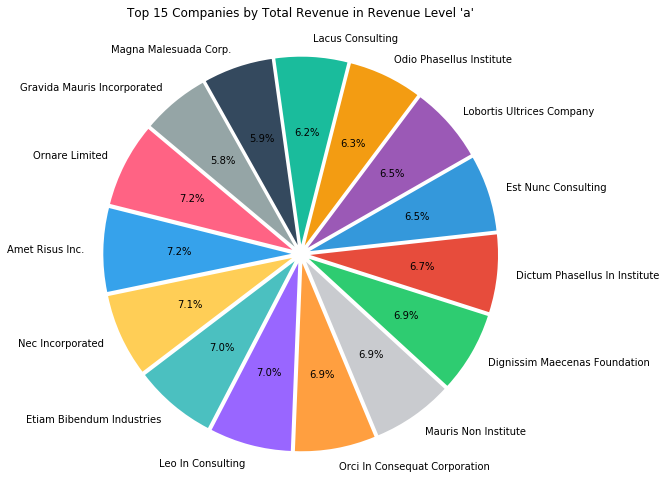

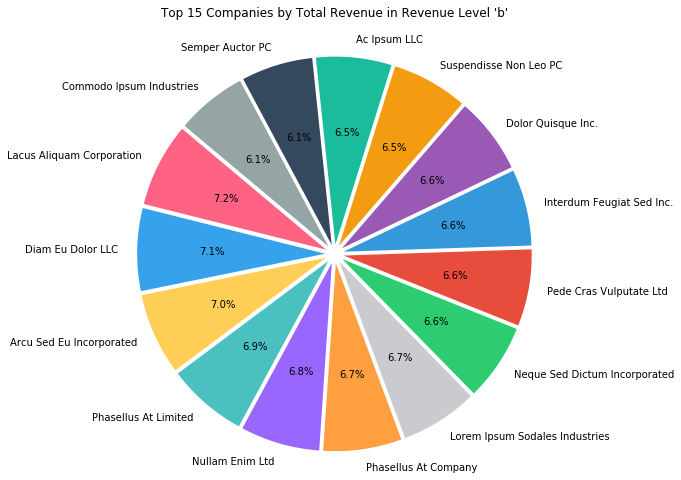

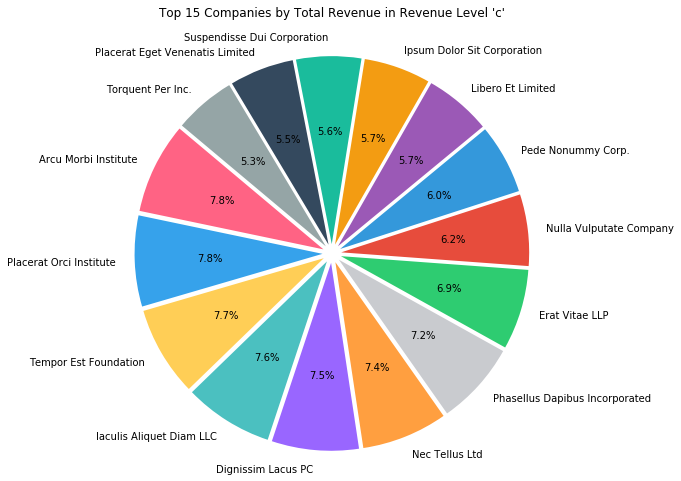

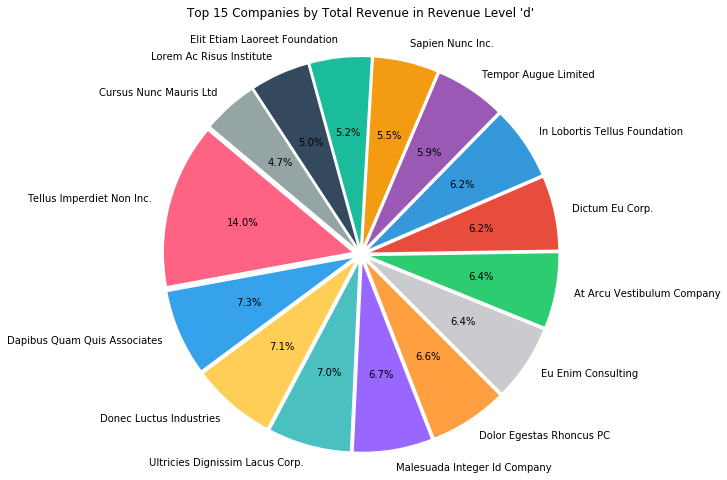

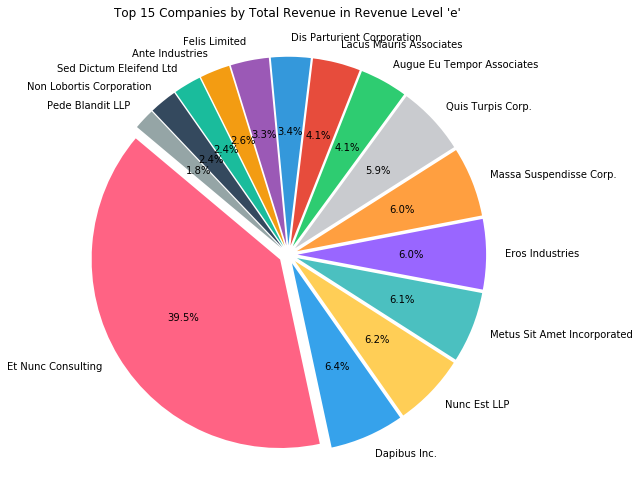

In [7]:

# Define revenue levels
revenue_levels = ['a', 'b', 'c', 'd', 'e']

# Loop through each revenue level
for level in revenue_levels:
    # Filter for the current revenue level
    revenue_level_df = merchant_profitability.filter(F.col("revenue_level") == level)
    
    # Group by company name and calculate the total revenue
    merchant_revenue = revenue_level_df.groupBy("name").agg(F.sum("total_revenue").alias("total_revenue"))
    
    # Sort by total revenue and select the top N companies (e.g., top 15)
    top_n_merchants = merchant_revenue.orderBy(F.desc("total_revenue")).limit(15).toPandas()
    
    # Call the function to plot the pie chart
    plot_top_merchants_pie(top_n_merchants, level)


We can see that from revenue level A to D, the top 15 merchants have approximately the same revenue level where as in revenue level E, Et Nunc Consulting seems to make up a large portion of the level's revenue. 

In [8]:
merchant_profitability

merchant_abn,total_commission,total_revenue,average_order_value,total_orders,merchant_avg_fp,consumer_avg_fp,name,category,revenue_level,take_rate
90543168331,213697.84209232908,7973800.078071984,257.44358241281066,30973,NULL,14.725798357376297,Phasellus Dapibus...,"furniture, home f...",c,2.68
17739089622,47133.39187079713,940786.2648861704,59.47943762320101,15817,NULL,15.61525967517665,Auctor Quis Corp.,"cable, satellite,...",b,5.01
31585975447,37719.75240193759,1208966.423139025,70.36647594080816,17181,NULL,16.031956390139737,Dolor Dapibus Gra...,digital goods: bo...,b,3.12
27504885147,24146.98409614597,502016.30137517606,91.96122025557356,5459,NULL,15.32290257361892,Enim Ltd,"gift, card, novel...",b,4.81
71787414647,24302.383088775678,401692.2824591021,173.06862665191818,2321,NULL,19.85847625452776,Aliquam Arcu Indu...,"furniture, home f...",a,6.05
72738688428,70298.80547550601,1239837.8390741805,166.4435278660465,7449,NULL,14.380924879693788,Donec Tempor Corp.,"books, periodical...",a,5.67
75104340635,16019.119376977735,593300.7176658419,98.81757456126614,6004,NULL,16.880769589094736,Nisl Elementum Ltd,health and beauty...,c,2.7
39685893174,4130.695849800111,737624.2588928767,406.85287307935835,1813,NULL,13.226394458848414,Nec Eleifend Non ...,"books, periodical...",d,0.56
60470122582,10642.853481469834,215007.14103979463,1791.726175331622,120,NULL,12.54198995441312,Consequat Purus I...,telecom,b,4.95
97603729191,87948.46120151696,1297174.9439751757,758.138482744112,1711,NULL,12.051349345373307,Eu Company,"stationery, offic...",a,6.78


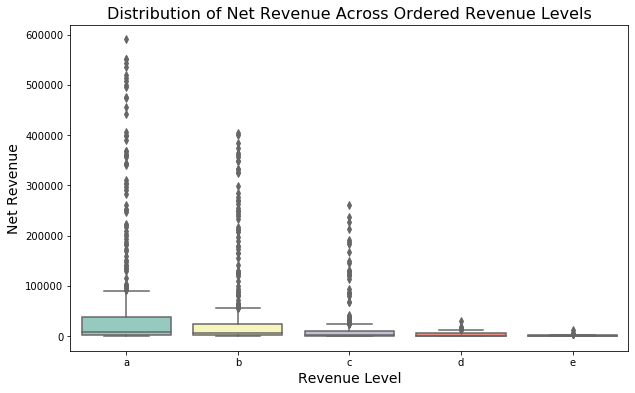

In [9]:

# Convert the Spark DataFrame to Pandas for visualization
merchant_profitability_pd = merchant_profitability.select("revenue_level", "total_commission").toPandas()

# Ensure that the revenue levels are ordered from 'a' to 'e'
ordered_levels = ['a', 'b', 'c', 'd', 'e']
merchant_profitability_pd['revenue_level'] = pd.Categorical(merchant_profitability_pd['revenue_level'], 
                                                           categories=ordered_levels, 
                                                           ordered=True)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the box plot using seaborn with the specified order
sns.boxplot(x="revenue_level", y="total_commission", data=merchant_profitability_pd, 
            palette="Set3", order=ordered_levels)

# Set the plot's title and labels
plt.title("Distribution of Net Revenue Across Ordered Revenue Levels", fontsize=16)
plt.xlabel("Revenue Level", fontsize=14)
plt.ylabel("Net Revenue", fontsize=14)

# Show the plot
plt.show()

In [8]:
merchant_profitability.show()

+------------+------------------+-------------------+------------+-------------------------+--------------------+--------------------+-------------+---------+------------------+
|merchant_abn|     total_revenue|average_order_value|total_orders|average_fraud_probability|                name|            category|revenue_level|take_rate|       net_revenue|
+------------+------------------+-------------------+------------+-------------------------+--------------------+--------------------+-------------+---------+------------------+
| 51321276923| 498594.8221654192| 149.14592347155823|        3343|                     NULL| Aenean Eget Limited|antique shops - s...|            b|     3.96|  19744.3549577506|
| 27500085887| 991894.6986807215|  151.4574284136084|        6549|                     NULL|Vitae Posuere Ind...|watch, clock, and...|            b|     4.85| 48106.89288601499|
| 65426342453|1001077.6780881734|  373.8154137745233|        2678|                     NULL|   Nisl Nulla Eu L

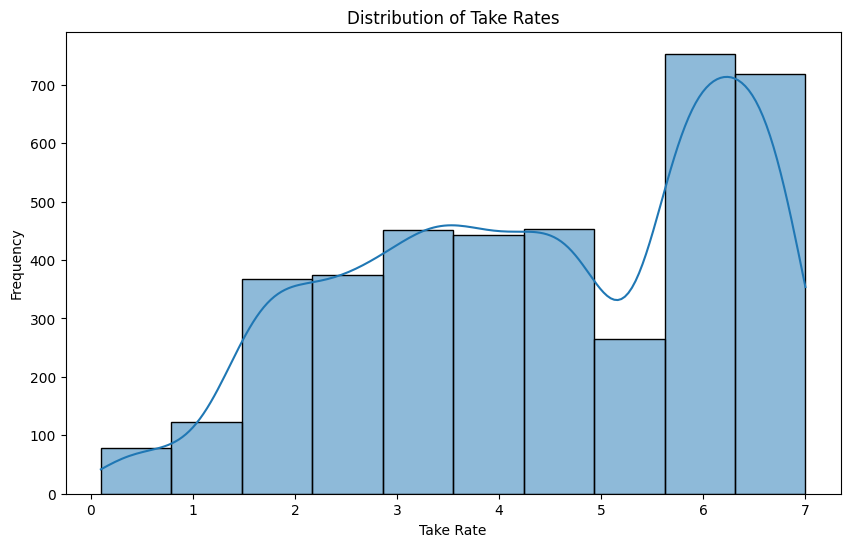

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame
# Assuming 'merchant_profitability' is your PySpark DataFrame
merchant_profitability_pandas = merchant_profitability.select('take_rate').toPandas()

# Plotting the take rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(merchant_profitability_pandas['take_rate'], bins=10, kde=True)
plt.title('Distribution of Take Rates')
plt.xlabel('Take Rate')
plt.ylabel('Frequency')
plt.show()

